In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('insurance.csv')

## EDA

In [6]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [7]:
# Row and columns
print(f'Rows:{df.shape[0]} & columns: {df.shape[1]}')

Rows:1338 & columns: 7


In [8]:
# statistic analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# handling null value
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
# numeric columns
numeric_col = ['age', 'bmi', 'children', 'charges']
df[numeric_col].head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


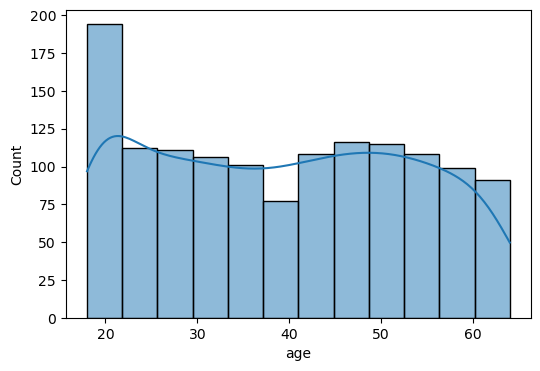

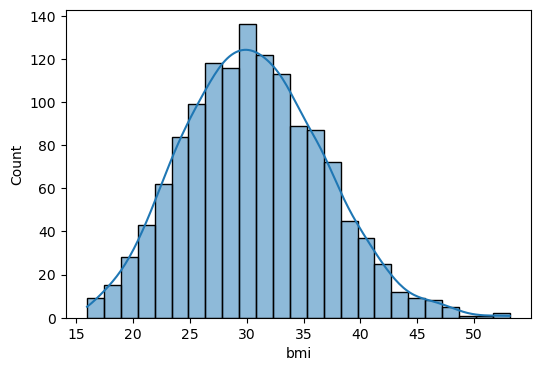

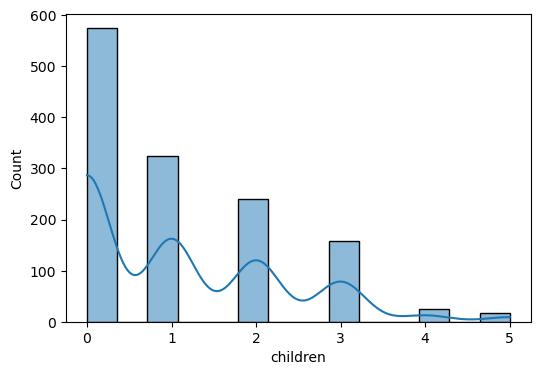

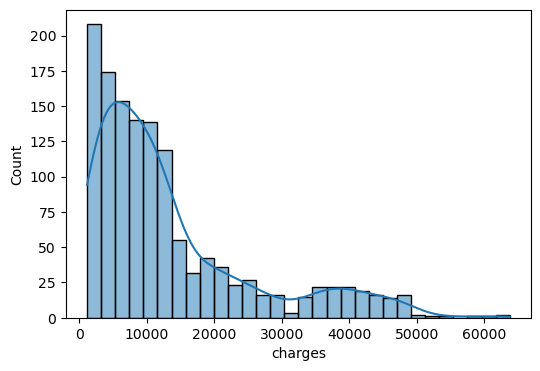

In [27]:
# analysing data distribution using histogram
for i in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(x = df[i], kde = True)

<Axes: xlabel='children', ylabel='count'>

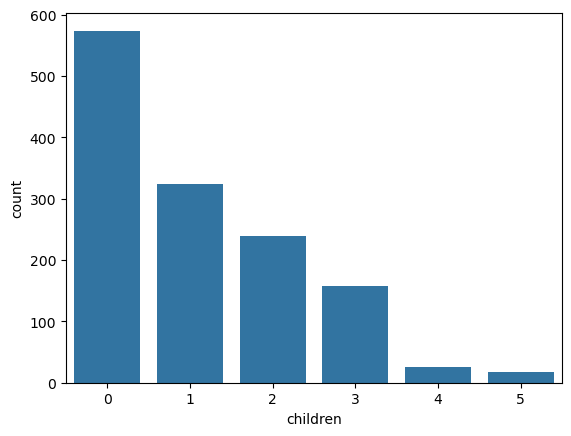

In [29]:
# children
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

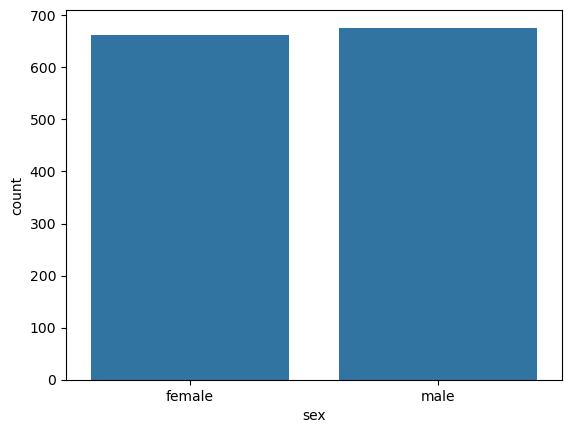

In [33]:
# gendere analyzing
sns.countplot(x = df['sex'])

In [35]:
# gender value counts
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

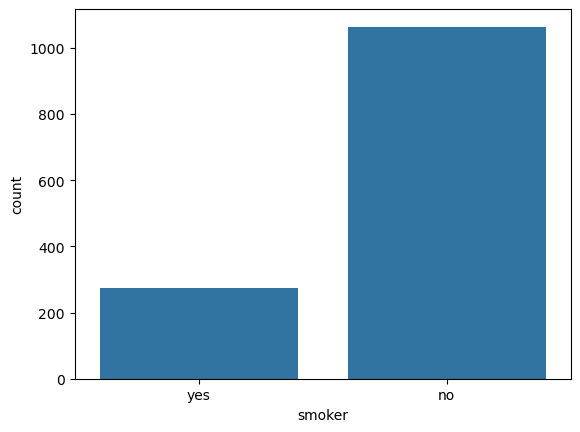

In [37]:
# smoker analyzing
sns.countplot(x = df['smoker'])

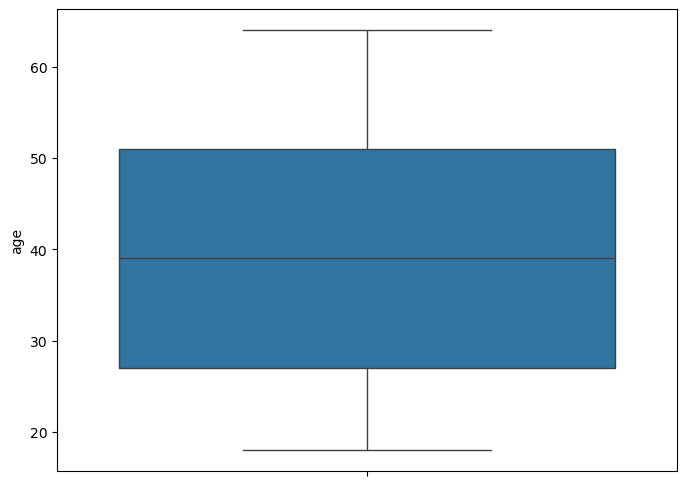

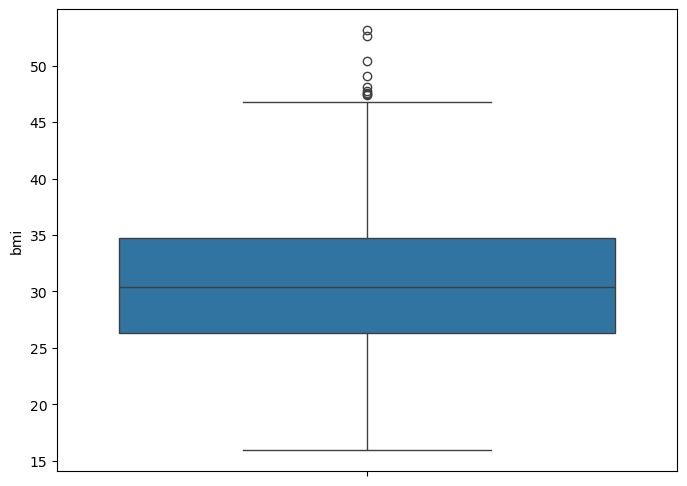

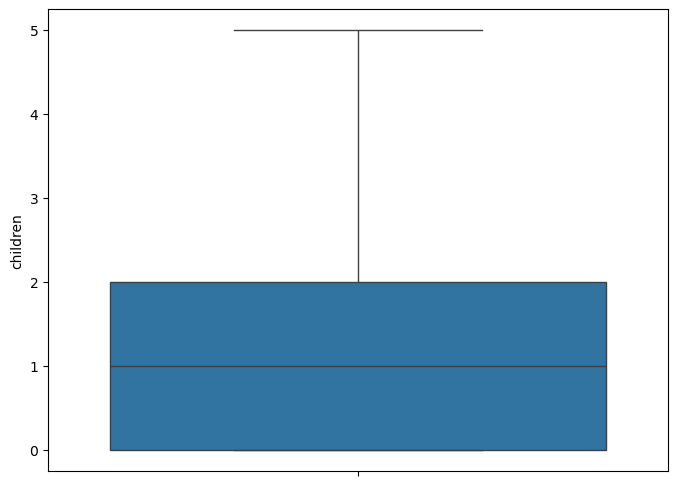

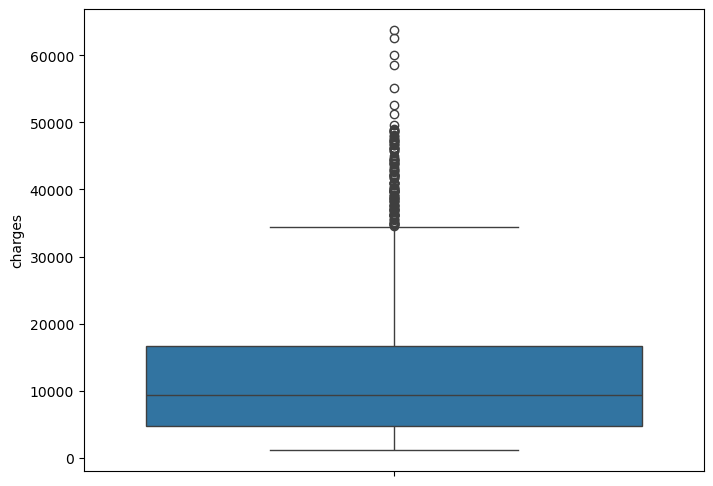

In [42]:
# identify outliers
for i in numeric_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y = df[i])

<Axes: >

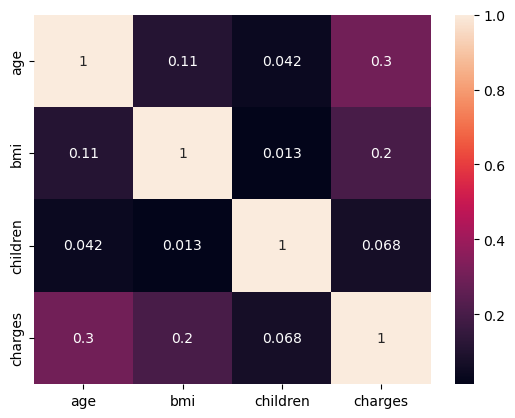

In [41]:
# correlation between variables
sns.heatmap(df.corr(numeric_only = True), annot = True)

# Data cleaning & preprocessing

In [65]:
df_cleaned = df.copy()

In [67]:
df_cleaned.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [68]:
# there is no null value
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
df_cleaned.shape

(1338, 7)

In [70]:
df_cleaned.shape

(1338, 7)

In [71]:
# checking data types
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
# for the machine learning model we need all numeric value
# checking gender data
df_cleaned['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [74]:
# label encoding on 'sex'
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0, 'female':1})

In [75]:
df_cleaned['sex'].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [76]:
# now, we are doing label encoding on 'smoker'
# checking smoker label
df_cleaned['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [77]:
# label encoding on 'smoker'
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0, 'yes':1})

In [80]:
df_cleaned['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [84]:
# rename columns name 'sex' to 'is_female' & 'smoker' to 'is_smoker'
df_cleaned.rename(columns = {
    'sex': 'is_female',
    'smoker': 'is_smoker',
    }, inplace=True)

In [85]:
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [86]:
# checking region columns
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
# we are doing, one-hot encoding on region columns to avoid anomalies
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], drop_first = True)

In [95]:
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,16884.9240,False,False,True
1,18,0,33.77,1,0,1725.5523,False,True,False
2,28,0,33.00,3,0,4449.4620,False,True,False


In [97]:
df_cleaned = df_cleaned.astype(int)

In [99]:
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0


## Feature Engineering & Extraction

<Axes: xlabel='bmi', ylabel='Count'>

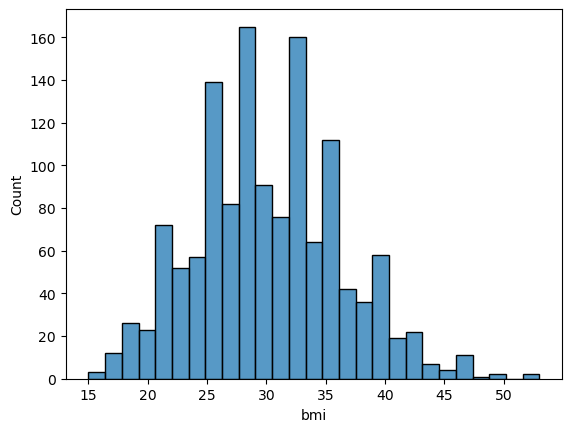

In [100]:
sns.histplot(df_cleaned['bmi'])

In [102]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [106]:
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese


In [ ]:
# now, again apply one-hot encoding on 'bmi_category' columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [112]:
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1


In [113]:
# converting bool into int
df_cleaned = df_cleaned.astype(int)

### Feature scaling

In [115]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [119]:
# apply standardscalar(standard deviation --> 3 to -3)
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [121]:
# we do this standard Scaler because now all values are in the 0 & 1 format for machine learning EXCEPT 'charges' column
df_cleaned.head(3)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,1,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,1,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,1,0,0,0,1


In [123]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [129]:
from scipy.stats import pearsonr

# pearson correlation calcution

# list of features to check against target('chages')
selected_features = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feture', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feture,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787251
0,age,0.299009
11,bmi_category_Obese,0.199533
2,bmi,0.196188
7,region_southeast,0.073981
3,children,0.067999
6,region_northwest,-0.039905
8,region_southwest,-0.043210
1,is_female,-0.057293


In [133]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southwest', 'region_southeast',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [135]:
from scipy.stats import chi2_contingency
import pandas as pd
alpha = 0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,854.020268,0.0,Reject Null (Keep Feature)
region_southeast,15.208814,0.001647,Reject Null (Keep Feature)
is_female,9.532132,0.022992,Reject Null (Keep Feature)
bmi_category_Obese,8.510101,0.036566,Reject Null (Keep Feature)
region_southwest,5.530825,0.136807,Accept Null (drop Feature)
bmi_category_Overweight,4.620089,0.201826,Accept Null (drop Feature)
bmi_category_Normal,3.578987,0.310661,Accept Null (drop Feature)
region_northwest,1.226112,0.746749,Accept Null (drop Feature)


In [137]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obese']]

In [138]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0
1,-1.509965,0,0.462657,-0.078767,0,1725,1,1
2,-0.797954,0,0.462657,1.580926,0,4449,1,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.768473,0,-0.027733,1.580926,0,10600,0,1
1334,-1.509965,1,0.135731,-0.908614,0,2205,0,1
1335,-1.509965,1,0.953046,-0.908614,0,1629,1,1
1336,-1.296362,1,-0.845048,-0.908614,0,2007,0,0
